In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('all_4000_posts.csv', )
df.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,...,banned_by,link_flair_template_id,crosspost_parent,crosspost_parent_list,suggested_sort,author_flair_template_id,is_gallery,link_flair_css_class,gallery_data,media_metadata
0,0,[],False,Maxcactus,NaN,[],NaN,text,t2_1vwn,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,D674CCE72D03091E,NaN,[],NaN,text,t2_fjiikr9v,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,Top-Tangerine-1192,NaN,[],NaN,text,t2_6lg34km1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,SpeeedyDelivery,NaN,[],NaN,text,t2_5x1pyqz4,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,kgrandia,NaN,[],NaN,text,t2_fnvy,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df[['title', 'selftext', 'subreddit', 'created_utc']]

,title,selftext,subreddit,created_utc
0,Trump Likes MyPillow Guy’s Plan to Melt Down V...,NaN,Liberal,1637144642
1,The Bad Guys Are Winning,NaN,Liberal,1637129834
2,I need help,[removed],Liberal,1637120509
3,Does ANY other judge ANYWHERE refuse to let la...,Or is that little philosophy indigenous to a s...,Liberal,1637109601
4,Student's Instagram Account Hacked and Stolen ...,NaN,Liberal,1637103211
...,...,...,...,...
3994,"#BiasJingleRepeaters: Nov 12, 2021 - Spotify’s...",NaN,Conservative,1636765290
3995,Power Company Warns Customers of Blackouts as ...,NaN,Conservative,1636765186
3996,Kyle Rittenhouse trial: Jury could be allowed ...,NaN,Conservative,1636764722
3997,5th district court smacks down POTUS vaccine m...,NaN,Conservative,1636764680


In [28]:
df['selftext'].isna().sum()

3088

In [29]:
df['selftext'] = df['selftext'].fillna('n/a')


In [30]:
df['title_and_st'] = df['title'] + df['selftext']

In [32]:
df.duplicated(subset=None, keep='first').sum()

0

In [33]:
# Making the Liberal posts be postive and Conservative negative (showing my political bias here haha)

df['subreddit'] = df['subreddit'].map({'Liberal':1, "Conservative":0})

In [34]:
X = df['title_and_st']
y = df['subreddit']

In [35]:
y.value_counts(normalize=True)

1    0.500125
0    0.499875
Name: subreddit, dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('model', LogisticRegression())]
)

In [38]:
params = {
    'tvec__stop_words':['english'],
    'tvec__ngram_range':[(1,2)],
    'tvec__min_df': [1],
    'tvec__max_df':[.2],
    'tvec__max_features': [4000],
    'tvec__binary': [True]
}

gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.7535820812465219


{'tvec__binary': True,
 'tvec__max_df': 0.2,
 'tvec__max_features': 4000,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

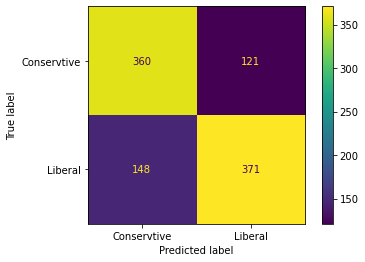

In [39]:
plot_confusion_matrix(gs, X_test, y_test, display_labels=['Conservtive', 'Liberal']);

In [40]:
preds = gs.predict(df['title_and_st'])

In [43]:
df['predictions'] = preds